In [ ]:
!pip3 install keras-visualizer

In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D , Conv2D , Flatten , Dense , Dropout , Activation
from keras_visualizer import visualizer

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

import imgaug.augmenters as iaa

In [ ]:
data = pd.read_csv("drive/MyDrive/Datasets/fer2013.csv")
dp = data["pixels"].tolist()
len(dp[2])

8581

In [ ]:
train = data[data["Usage"]=="Training"]
test = data[data["Usage"]=="PublicTest"]
test["emotion"].shape[0]

3589

In [ ]:
train.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
X_train = []
X_test = []
for c in train["pixels"].tolist():
  x = [int(xt) for xt in c.split(' ')]
  X_train.append(x)

for c in test["pixels"].tolist():
  x = [int(xt) for xt in c.split(' ')]
  X_test.append(x)

X_train = np.asarray(X_train).reshape(-1,48,48)
X_test = np.asarray(X_test).reshape(-1,48,48)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [ ]:
y_train = np.asarray(train["emotion"]).reshape(train["emotion"].shape[0],1)
y_test = np.asarray(test["emotion"]).reshape(test["emotion"].shape[0],1)

X_train = np.repeat(X_train[...,np.newaxis], 3, -1)
X_test = np.repeat(X_test[...,np.newaxis], 3, -1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28709, 48, 48, 3)
(3589, 48, 48, 3)
(28709, 1)
(3589, 1)


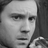

In [ ]:
cv2_imshow(X_train[0])

In [ ]:
X_flip = []
for im in X_train:
  flip = iaa.Fliplr(p=1.0).augment_image(im)
  X_flip.append(flip)

In [ ]:
X_flip = np.asarray(X_flip).reshape(-1,48,48,3)
print(X_flip.shape)

(28709, 48, 48, 3)


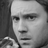

In [ ]:
cv2_imshow(X_flip[0])

In [ ]:
X_train = np.vstack((X_train,X_flip))
print(X_train.shape)

(57418, 48, 48, 3)


In [ ]:
y_tr = y_train

In [ ]:
y_train = np.vstack((y_train,y_tr))
print(y_train.shape)

(57418, 1)


In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train, 7)
y_test = tensorflow.keras.utils.to_categorical(y_test, 7)
input_shape=(48,48,3)

In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),padding="same",
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),padding="same",
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(64, (3, 3),padding="same", activation='relu'))
model.add(Conv2D(64, (3,3),padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),padding="same", activation='relu'))
model.add(Conv2D(128, (3,3),padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),padding="same", activation='relu'))
model.add(Conv2D(256, (3,3),padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(learning_rate= 0.0001),
              metrics=['accuracy'])

batch_size = 64
num_epoch = 12
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

"\nmodel.compile(loss=tensorflow.keras.losses.categorical_crossentropy,\n              optimizer=tensorflow.keras.optimizers.Adam(learning_rate= 0.0001),\n              metrics=['accuracy'])\n\nbatch_size = 64\nnum_epoch = 12\nmodel_log = model.fit(X_train, y_train,\n          batch_size=batch_size,\n          epochs=num_epoch,\n          verbose=1,\n          validation_data=(X_test, y_test))\n"

In [ ]:
visualizer(model, format='png', view=True)

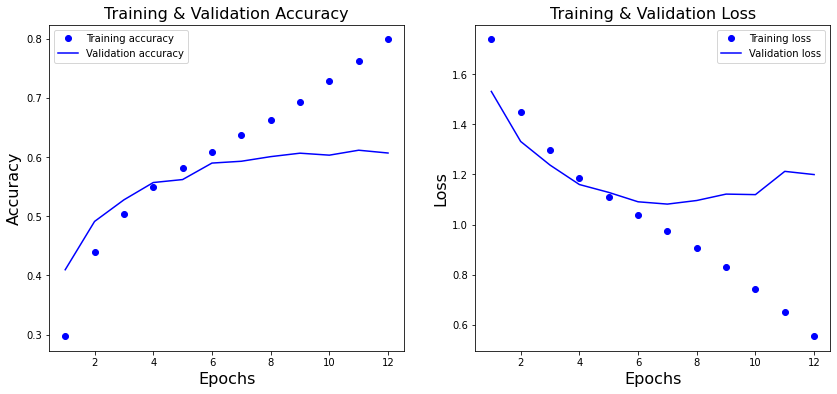

In [ ]:
import matplotlib.pyplot as plt
  
history_dict = model_log.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
  
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 12, 12, 128)      

In [ ]:
model.save('EmotionDetector.h5')